In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("/home/pmburu/repo/Kaggle_Competition/TMDB_Box_Office_Prediction/data/train.csv")

Text(0.5, 1.0, 'Runtime')

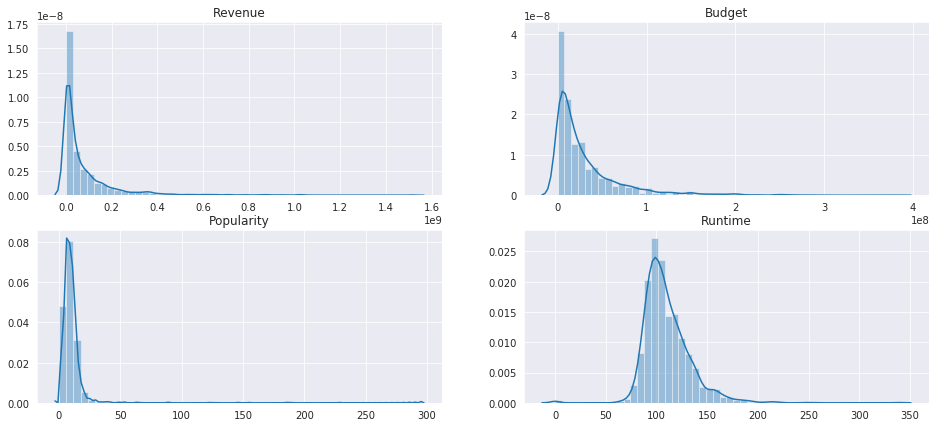

In [54]:
# Distribution of float variables
fig, axes = plt.subplots(2,2, figsize=[16, 7])
sns.distplot(df["revenue"], ax=axes[0][0], axlabel=False)
axes[0][0].set_title("Revenue")
sns.distplot(df["budget"], ax=axes[0][1], axlabel=False)
axes[0][1].set_title("Budget")
sns.distplot(df["popularity"], ax=axes[1][0], axlabel=False)
axes[1][0].set_title("Popularity")
sns.distplot(df["runtime"].dropna(), ax=axes[1][1], axlabel=False)
axes[1][1].set_title("Runtime")

In [56]:
df["log_revenue"] = np.log1p(df["revenue"])
df["log_budget"] = np.log1p(df["budget"])

In [94]:
for index , row in df.iterrows():
    try:
        for i in eval(row["genres"]):
            name = i["name"]
            try:
                df.loc[index, name] = 1
            except KeyError:
                df[name] = 0
                df.loc[index, name] = 1
    except TypeError:
        pass
            

In [98]:
for var in ['Comedy', 'Drama', 'Family', 'Romance','Thriller', 'Animation', 'Adventure', 'Horror', 'Music', 'Crime','Action', 'Science Fiction', 'Mystery', 'Fantasy', 'War', 'Western','Foreign', 'History', 'Documentary', 'TV Movie']:
    df[var] = df[var].fillna(0)

In [119]:
df["production_countries"].unique()

array(["[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'IN', 'name': 'India'}]", nan,
       "[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]",
       "[{'iso_3166_1': 'RS', 'name': 'Serbia'}]",
       "[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",
       "[{'iso_3166_1': 'FR', 'name': 'France'}]",
       "[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'IE', 'name': 'Ireland'}]",
       "[{'iso_3166_1': 'IT', 'name': 'Italy'}]",
       "[{'iso_3166_1': 'BE', 'name': 'Belgium'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_